In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Kidney_disease.csv")

In [3]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
df.shape

(400, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [6]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [7]:
df.drop('id', axis=1,inplace=True)

In [8]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [9]:
df.columns=[
    "Age",
    "Blood Pressure",
    "Specific Gravity",
    "Albumin",
    "Sugar",
    "Red Blood Cells",
    "Pus Cells",
    "Pus Cell Clumps",
    "Bacteria",
    "Blood Glucose Random",
    "Blood Urea",
    "Serum Creatinine",
    "Sodium",
    "Potassium",
    "Hemoglobin",
    "Packed Cell Volume",
    "White Blood Cell Count",
    "Red Blood Cell Count",
    "Hypertension",
    "Diabetes Mellitus",
    "Coronary Artery Disease",
    "Appetite",
    "Pedal Edema",
    "Anemia",
    "Classification"
]


In [10]:
df.columns

Index(['Age', 'Blood Pressure', 'Specific Gravity', 'Albumin', 'Sugar',
       'Red Blood Cells', 'Pus Cells', 'Pus Cell Clumps', 'Bacteria',
       'Blood Glucose Random', 'Blood Urea', 'Serum Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed Cell Volume',
       'White Blood Cell Count', 'Red Blood Cell Count', 'Hypertension',
       'Diabetes Mellitus', 'Coronary Artery Disease', 'Appetite',
       'Pedal Edema', 'Anemia', 'Classification'],
      dtype='object')

In [11]:
df.describe()

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Blood Glucose Random,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [12]:
df.dtypes

Age                        float64
Blood Pressure             float64
Specific Gravity           float64
Albumin                    float64
Sugar                      float64
Red Blood Cells             object
Pus Cells                   object
Pus Cell Clumps             object
Bacteria                    object
Blood Glucose Random       float64
Blood Urea                 float64
Serum Creatinine           float64
Sodium                     float64
Potassium                  float64
Hemoglobin                 float64
Packed Cell Volume          object
White Blood Cell Count      object
Red Blood Cell Count        object
Hypertension                object
Diabetes Mellitus           object
Coronary Artery Disease     object
Appetite                    object
Pedal Edema                 object
Anemia                      object
Classification              object
dtype: object

In [13]:
df['Packed Cell Volume'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '\t?', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51',
       '54'], dtype=object)

In [14]:
#due to some string values in the columns its is an object columns but say still you want to convert 
#what to coonvert to the numeric value

In [14]:
df['Packed Cell Volume']=pd.to_numeric(df['Packed Cell Volume'],errors='coerce')#coerce means ignore 

In [15]:
df['Packed Cell Volume'].dtypes

dtype('float64')

In [16]:
df['Packed Cell Volume'].unique()
#all string charctr converted to the numeric value

array([44., 38., 31., 32., 35., 39., 36., 33., 29., 28., nan, 16., 24.,
       37., 30., 34., 40., 45., 27., 48., 52., 14., 22., 18., 42., 17.,
       46., 23., 19., 25., 41., 26., 15., 21., 43., 20., 47.,  9., 49.,
       50., 53., 51., 54.])

In [17]:
df.columns

Index(['Age', 'Blood Pressure', 'Specific Gravity', 'Albumin', 'Sugar',
       'Red Blood Cells', 'Pus Cells', 'Pus Cell Clumps', 'Bacteria',
       'Blood Glucose Random', 'Blood Urea', 'Serum Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed Cell Volume',
       'White Blood Cell Count', 'Red Blood Cell Count', 'Hypertension',
       'Diabetes Mellitus', 'Coronary Artery Disease', 'Appetite',
       'Pedal Edema', 'Anemia', 'Classification'],
      dtype='object')

In [18]:
df['White Blood Cell Count'].unique()

array(['7800', '6000', '7500', '6700', '7300', nan, '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9800', '9100', '7900', '6400',
       '8600', '18900', '21600', '4300', '8500', '11300', '7200', '7700',
       '14600', '6300', '\t6200', '7100', '11800', '9400', '5500', '5800',
       '13200', '12500', '5600', '7000', '11900', '10400', '10700',
       '12700', '6800', '6500', '13600', '10200', '9000', '14900', '8200',
       '15200', '5000', '16300', '12400', '\t8400', '10500', '4200',
       '4700', '10900', '8100', '9500', '2200', '12800', '11200', '19100',
       '\t?', '12300', '16700', '2600', '26400', '8800', '7400', '4900',
       '8000', '12000', '15700', '4100', '5700', '11500', '5400', '10800',
       '9900', '5200', '5900', '9300', '9700', '5100', '6600'],
      dtype=object)

In [19]:
df['White Blood Cell Count']=pd.to_numeric(df['White Blood Cell Count'],errors='coerce')

In [20]:
df.columns

Index(['Age', 'Blood Pressure', 'Specific Gravity', 'Albumin', 'Sugar',
       'Red Blood Cells', 'Pus Cells', 'Pus Cell Clumps', 'Bacteria',
       'Blood Glucose Random', 'Blood Urea', 'Serum Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed Cell Volume',
       'White Blood Cell Count', 'Red Blood Cell Count', 'Hypertension',
       'Diabetes Mellitus', 'Coronary Artery Disease', 'Appetite',
       'Pedal Edema', 'Anemia', 'Classification'],
      dtype='object')

In [21]:
df['Red Blood Cell Count']=pd.to_numeric(df['Red Blood Cell Count'],errors='coerce')

In [22]:
categorical_col=[col for col in df.columns if df[col].dtype=='object']

In [23]:
numerical_col=[col for col in df.columns if df[col].dtype!='numeric']

In [24]:
numerical_col

['Age',
 'Blood Pressure',
 'Specific Gravity',
 'Albumin',
 'Sugar',
 'Red Blood Cells',
 'Pus Cells',
 'Pus Cell Clumps',
 'Bacteria',
 'Blood Glucose Random',
 'Blood Urea',
 'Serum Creatinine',
 'Sodium',
 'Potassium',
 'Hemoglobin',
 'Packed Cell Volume',
 'White Blood Cell Count',
 'Red Blood Cell Count',
 'Hypertension',
 'Diabetes Mellitus',
 'Coronary Artery Disease',
 'Appetite',
 'Pedal Edema',
 'Anemia',
 'Classification']

In [25]:
for col in categorical_col:
    print(f"{col} has{df[col].unique()}")

Red Blood Cells has[nan 'normal' 'abnormal']
Pus Cells has['normal' 'abnormal' nan]
Pus Cell Clumps has['notpresent' 'present' nan]
Bacteria has['notpresent' 'present' nan]
Hypertension has['yes' 'no' nan]
Diabetes Mellitus has['yes' 'no' ' yes' '\tno' '\tyes' nan]
Coronary Artery Disease has['no' 'yes' '\tno' nan]
Appetite has['good' 'poor' nan]
Pedal Edema has['no' 'yes' nan]
Anemia has['no' 'yes' nan]
Classification has['ckd' 'ckd\t' 'notckd']


In [26]:
df['Diabetes Mellitus'].replace(to_replace={' yes':'yes',"\tno":"no","\tyes":"yes"}, inplace=True)

In [27]:
df['Diabetes Mellitus'].unique()

array(['yes', 'no', nan], dtype=object)

In [28]:
df['Coronary Artery Disease'].replace(to_replace={'\tno':'no'},inplace=True)

In [29]:
df['Coronary Artery Disease'].unique()

array(['no', 'yes', nan], dtype=object)

In [30]:
df['Classification']=df['Classification'].map({'ckd':1,'ckd\t':1,'notckd':0})

In [31]:
df['Classification'].unique()
#You could have also first replace and then map witn 1 and 0

array([1, 0])

Text(0, 0.5, 'frequency')

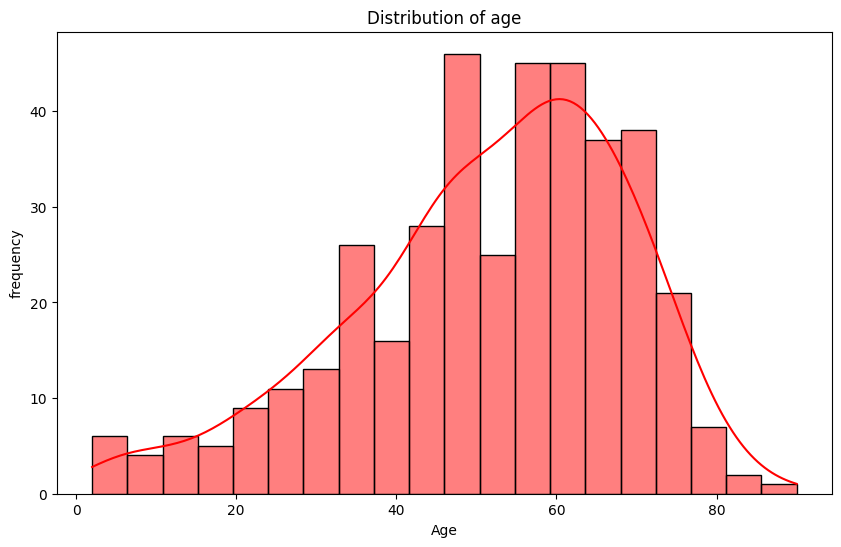

In [32]:
#univariante anaysis
plt.figure(figsize=(10,6))
sns.histplot(df['Age'].dropna(),kde=True,bins=20,color='r')
plt.title('Distribution of age')
plt.xlabel('Age')
plt.ylabel('frequency')

In [34]:
#insight >>age is the left skwed data
df.columns

Index(['Age', 'Blood Pressure', 'Specific Gravity', 'Albumin', 'Sugar',
       'Red Blood Cells', 'Pus Cells', 'Pus Cell Clumps', 'Bacteria',
       'Blood Glucose Random', 'Blood Urea', 'Serum Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed Cell Volume',
       'White Blood Cell Count', 'Red Blood Cell Count', 'Hypertension',
       'Diabetes Mellitus', 'Coronary Artery Disease', 'Appetite',
       'Pedal Edema', 'Anemia', 'Classification'],
      dtype='object')

<Axes: xlabel='Hypertension', ylabel='count'>

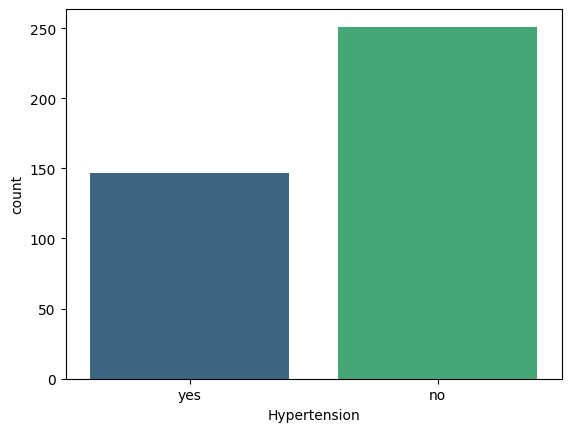

In [35]:
sns.countplot(x='Hypertension',data=df,palette='viridis')

In [36]:
#150 of them is the hypertension

In [37]:
df.columns

Index(['Age', 'Blood Pressure', 'Specific Gravity', 'Albumin', 'Sugar',
       'Red Blood Cells', 'Pus Cells', 'Pus Cell Clumps', 'Bacteria',
       'Blood Glucose Random', 'Blood Urea', 'Serum Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed Cell Volume',
       'White Blood Cell Count', 'Red Blood Cell Count', 'Hypertension',
       'Diabetes Mellitus', 'Coronary Artery Disease', 'Appetite',
       'Pedal Edema', 'Anemia', 'Classification'],
      dtype='object')

<Axes: xlabel='Classification', ylabel='Blood Urea'>

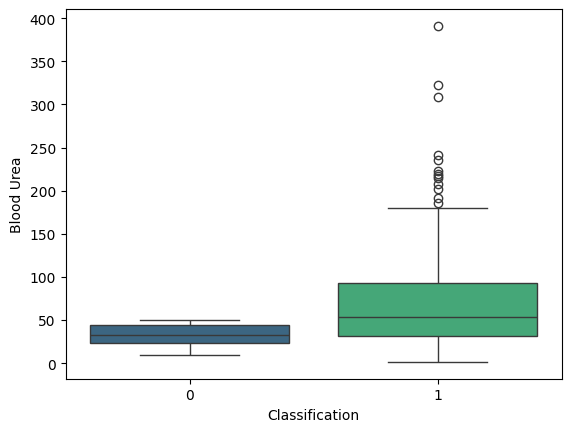

In [40]:
sns.boxplot(x='Classification',y='Blood Urea',data=df,palette='viridis')

In [41]:
#insight>> people with kidney disease has higher blood_urea with outlier,meadian value is also high

In [42]:
df.columns

Index(['Age', 'Blood Pressure', 'Specific Gravity', 'Albumin', 'Sugar',
       'Red Blood Cells', 'Pus Cells', 'Pus Cell Clumps', 'Bacteria',
       'Blood Glucose Random', 'Blood Urea', 'Serum Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed Cell Volume',
       'White Blood Cell Count', 'Red Blood Cell Count', 'Hypertension',
       'Diabetes Mellitus', 'Coronary Artery Disease', 'Appetite',
       'Pedal Edema', 'Anemia', 'Classification'],
      dtype='object')

<Axes: xlabel='Classification', ylabel='Serum Creatinine'>

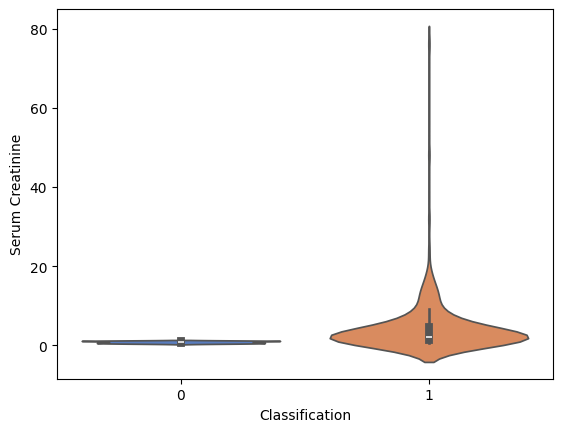

In [43]:
sns.violinplot(x='Classification',y='Serum Creatinine',data=df,palette='muted')

<Axes: xlabel='Anemia', ylabel='count'>

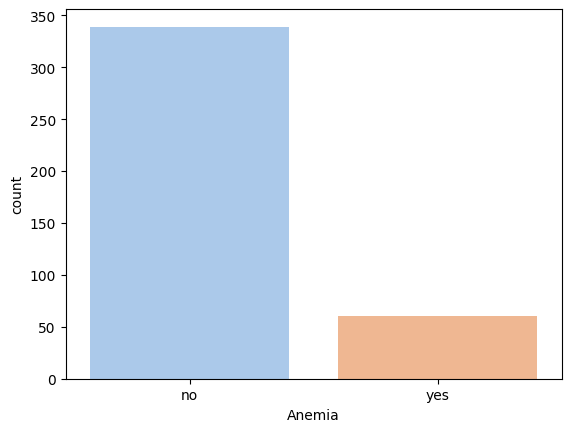

In [44]:
sns.countplot(x='Anemia',data=df,palette='pastel')

In [ ]:
#Majority people is not suffering from

In [46]:
df.Appetite

0      good
1      good
2      poor
3      poor
4      good
       ... 
395    good
396    good
397    good
398    good
399    good
Name: Appetite, Length: 400, dtype: object

<Axes: ylabel='count'>

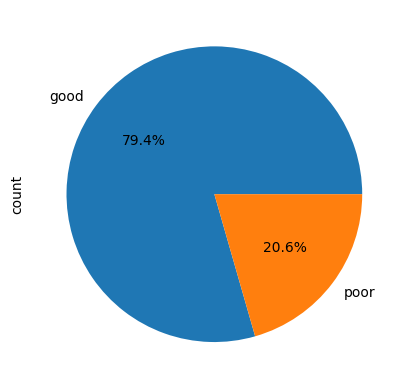

In [50]:
df['Appetite'].value_counts().plot.pie(autopct="%1.1f%%")

<Axes: ylabel='count'>

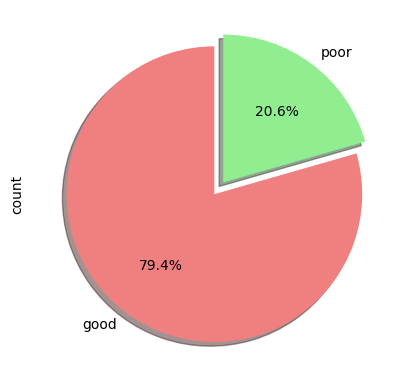

In [56]:
df['Appetite'].value_counts().plot.pie(autopct="%1.1f%%",colors=['lightcoral','lightgreen'],explode=(0,0.1),startangle=90,shadow=True)
#lets make pie chart more beautiful

In [57]:
df.columns

Index(['Age', 'Blood Pressure', 'Specific Gravity', 'Albumin', 'Sugar',
       'Red Blood Cells', 'Pus Cells', 'Pus Cell Clumps', 'Bacteria',
       'Blood Glucose Random', 'Blood Urea', 'Serum Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed Cell Volume',
       'White Blood Cell Count', 'Red Blood Cell Count', 'Hypertension',
       'Diabetes Mellitus', 'Coronary Artery Disease', 'Appetite',
       'Pedal Edema', 'Anemia', 'Classification'],
      dtype='object')

In [59]:
df['Pus Cell Clumps']

0      notpresent
1      notpresent
2      notpresent
3         present
4      notpresent
          ...    
395    notpresent
396    notpresent
397    notpresent
398    notpresent
399    notpresent
Name: Pus Cell Clumps, Length: 400, dtype: object

<Axes: xlabel='Pus Cell Clumps', ylabel='count'>

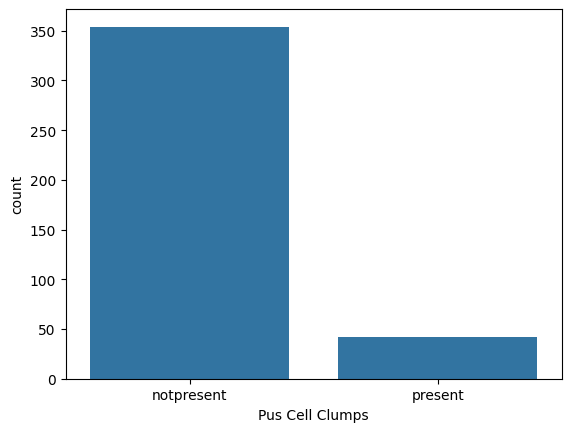

In [60]:
sns.countplot(x='Pus Cell Clumps',data=df)

In [61]:
df.columns

Index(['Age', 'Blood Pressure', 'Specific Gravity', 'Albumin', 'Sugar',
       'Red Blood Cells', 'Pus Cells', 'Pus Cell Clumps', 'Bacteria',
       'Blood Glucose Random', 'Blood Urea', 'Serum Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed Cell Volume',
       'White Blood Cell Count', 'Red Blood Cell Count', 'Hypertension',
       'Diabetes Mellitus', 'Coronary Artery Disease', 'Appetite',
       'Pedal Edema', 'Anemia', 'Classification'],
      dtype='object')

<Axes: xlabel='White Blood Cell Count', ylabel='Count'>

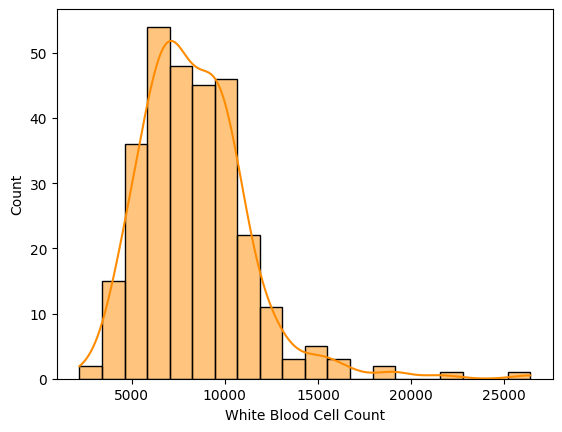

In [62]:
sns.histplot(df['White Blood Cell Count'].dropna(),bins=20,kde=True,color='darkorange')

In [64]:
#donut plot >>donut chart or ring chart , it is essentail a pie chart with the hole in the center 
#by specifying wedgeprops value
#used to display propotion

In [65]:
df.columns

Index(['Age', 'Blood Pressure', 'Specific Gravity', 'Albumin', 'Sugar',
       'Red Blood Cells', 'Pus Cells', 'Pus Cell Clumps', 'Bacteria',
       'Blood Glucose Random', 'Blood Urea', 'Serum Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed Cell Volume',
       'White Blood Cell Count', 'Red Blood Cell Count', 'Hypertension',
       'Diabetes Mellitus', 'Coronary Artery Disease', 'Appetite',
       'Pedal Edema', 'Anemia', 'Classification'],
      dtype='object')

<Axes: ylabel='count'>

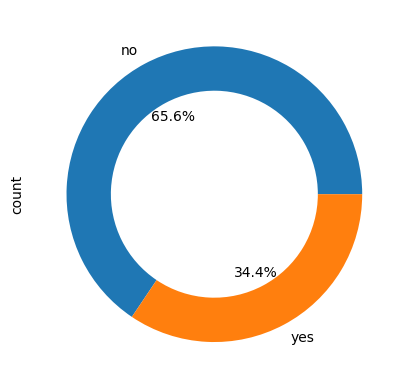

In [71]:
df['Diabetes Mellitus'].value_counts().plot.pie(autopct="%1.1f%%",wedgeprops=dict(width=0.3))

In [72]:
df.columns

Index(['Age', 'Blood Pressure', 'Specific Gravity', 'Albumin', 'Sugar',
       'Red Blood Cells', 'Pus Cells', 'Pus Cell Clumps', 'Bacteria',
       'Blood Glucose Random', 'Blood Urea', 'Serum Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed Cell Volume',
       'White Blood Cell Count', 'Red Blood Cell Count', 'Hypertension',
       'Diabetes Mellitus', 'Coronary Artery Disease', 'Appetite',
       'Pedal Edema', 'Anemia', 'Classification'],
      dtype='object')

<Axes: xlabel='Coronary Artery Disease', ylabel='count'>

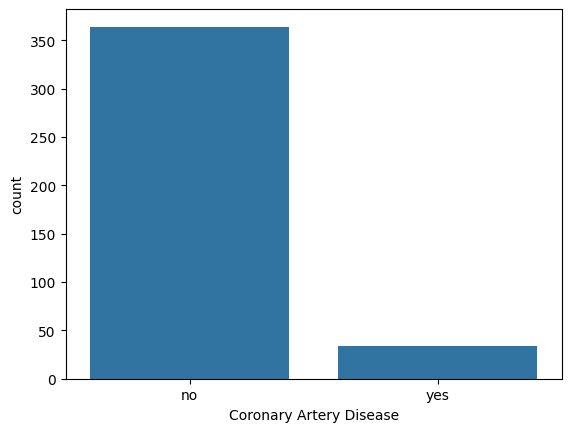

In [73]:
sns.countplot(x='Coronary Artery Disease',data=df)

In [74]:
df.columns

Index(['Age', 'Blood Pressure', 'Specific Gravity', 'Albumin', 'Sugar',
       'Red Blood Cells', 'Pus Cells', 'Pus Cell Clumps', 'Bacteria',
       'Blood Glucose Random', 'Blood Urea', 'Serum Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed Cell Volume',
       'White Blood Cell Count', 'Red Blood Cell Count', 'Hypertension',
       'Diabetes Mellitus', 'Coronary Artery Disease', 'Appetite',
       'Pedal Edema', 'Anemia', 'Classification'],
      dtype='object')

<Axes: xlabel='Pedal Edema', ylabel='count'>

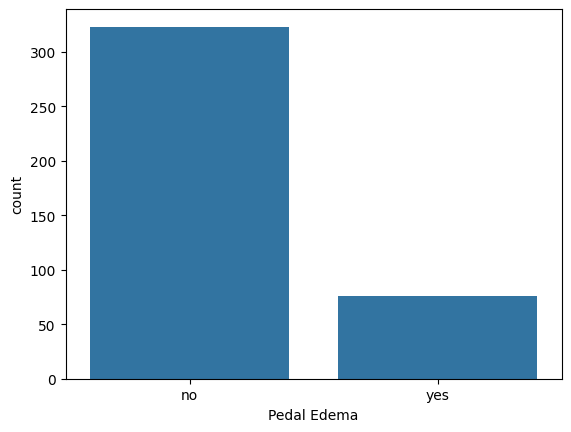

In [75]:
sns.countplot(x='Pedal Edema',data=df)

<Axes: xlabel='Age', ylabel='Blood Pressure'>

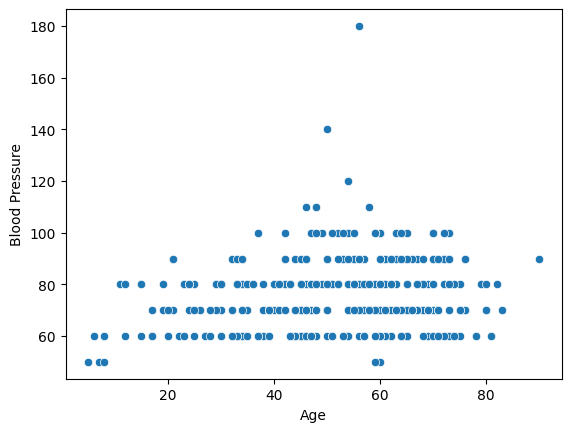

In [76]:
#bivarient analyisis
sns.scatterplot(x='Age',y='Blood Pressure',data=df)

In [77]:
#insight as age incresing the bp is also incresing

<Axes: xlabel='Age', ylabel='Blood Pressure'>

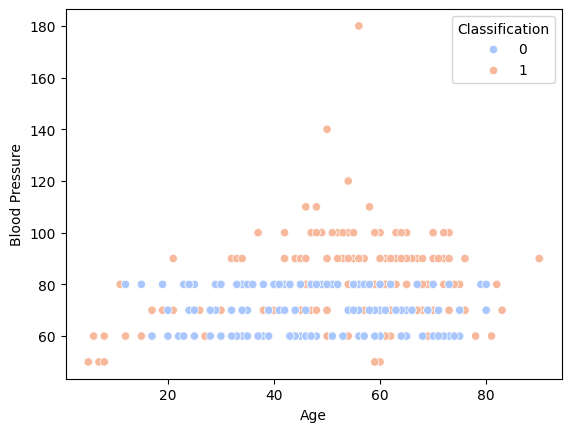

In [81]:
sns.scatterplot(x='Age',y='Blood Pressure',data=df,hue='Classification',palette='coolwarm')

<Axes: xlabel='Diabetes Mellitus', ylabel='Albumin'>

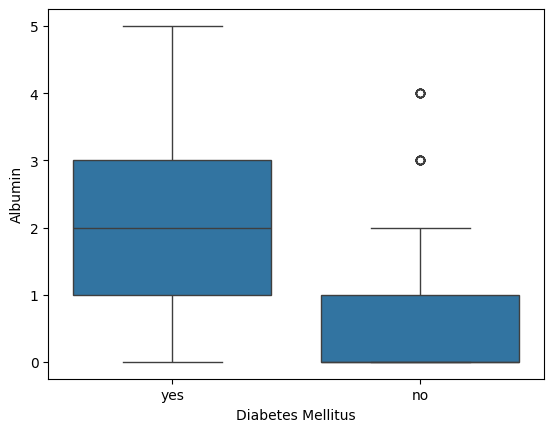

In [82]:
sns.boxplot(x='Diabetes Mellitus',y='Albumin',data=df)

<Axes: xlabel='Diabetes Mellitus', ylabel='Albumin'>

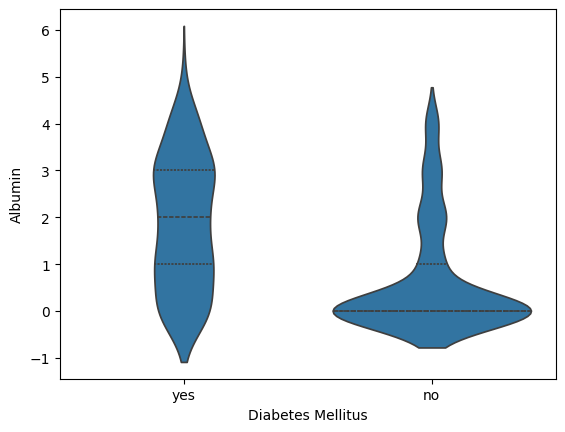

In [85]:
sns.violinplot(x='Diabetes Mellitus',y='Albumin',data=df,inner='quartile')

In [86]:
#stacked bar chart >> daibetes mellitus and hyper tension
df.columns

Index(['Age', 'Blood Pressure', 'Specific Gravity', 'Albumin', 'Sugar',
       'Red Blood Cells', 'Pus Cells', 'Pus Cell Clumps', 'Bacteria',
       'Blood Glucose Random', 'Blood Urea', 'Serum Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed Cell Volume',
       'White Blood Cell Count', 'Red Blood Cell Count', 'Hypertension',
       'Diabetes Mellitus', 'Coronary Artery Disease', 'Appetite',
       'Pedal Edema', 'Anemia', 'Classification'],
      dtype='object')

In [88]:
pd.crosstab(df['Diabetes Mellitus'],df['Hypertension'])
#cross tab sumries the data

Hypertension,no,yes
Diabetes Mellitus,,
no,220,41
yes,31,106


In [89]:
diabetes_hypertension=pd.crosstab(df['Diabetes Mellitus'],df['Hypertension'])

<Axes: xlabel='Diabetes Mellitus'>

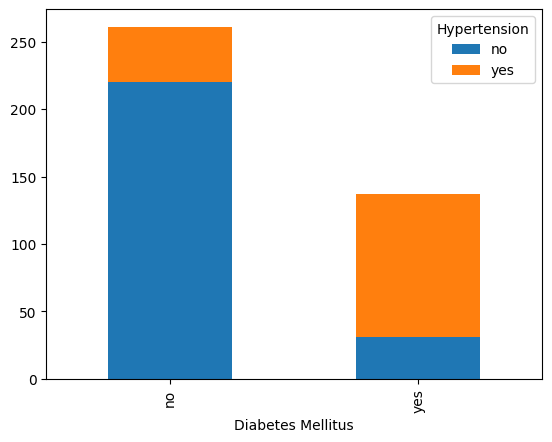

In [90]:
diabetes_hypertension.plot(kind='bar',stacked=True)

In [91]:
#multivarient analysis
cols=['Age','Blood Pressure','Blood Glucose Random','Serum Creatinine','Classification']
df[cols]

,Age,Blood Pressure,Blood Glucose Random,Serum Creatinine,Classification
0,48.0,80.0,121.0,1.2,1
1,7.0,50.0,NaN,0.8,1
2,62.0,80.0,423.0,1.8,1
3,48.0,70.0,117.0,3.8,1
4,51.0,80.0,106.0,1.4,1
...,...,...,...,...,...
395,55.0,80.0,140.0,0.5,0
396,42.0,70.0,75.0,1.2,0
397,12.0,80.0,100.0,0.6,0
398,17.0,60.0,114.0,1.0,0


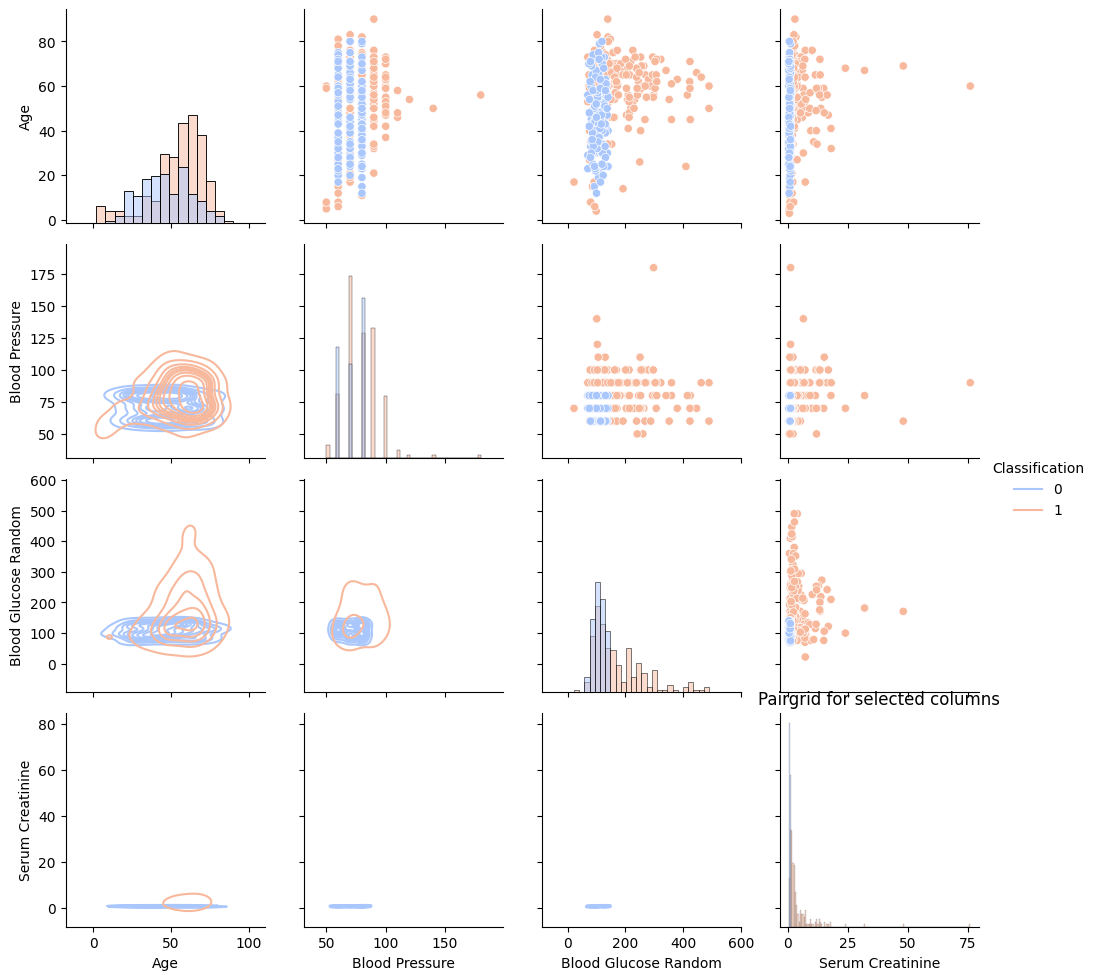

In [ ]:
R=sns.PairGrid(df[cols],hue='Classification',palette='coolwarm')
R.map_upper(sns.scatterplot) #Upper plot 
R.map_lower(sns.kdeplot,cmap='Blue_d') #diagonal plot
R.map_diag(sns.histplot) #lower plot
R.add_legend()
plt.title("Pairgrid for selected columns")
plt.show()

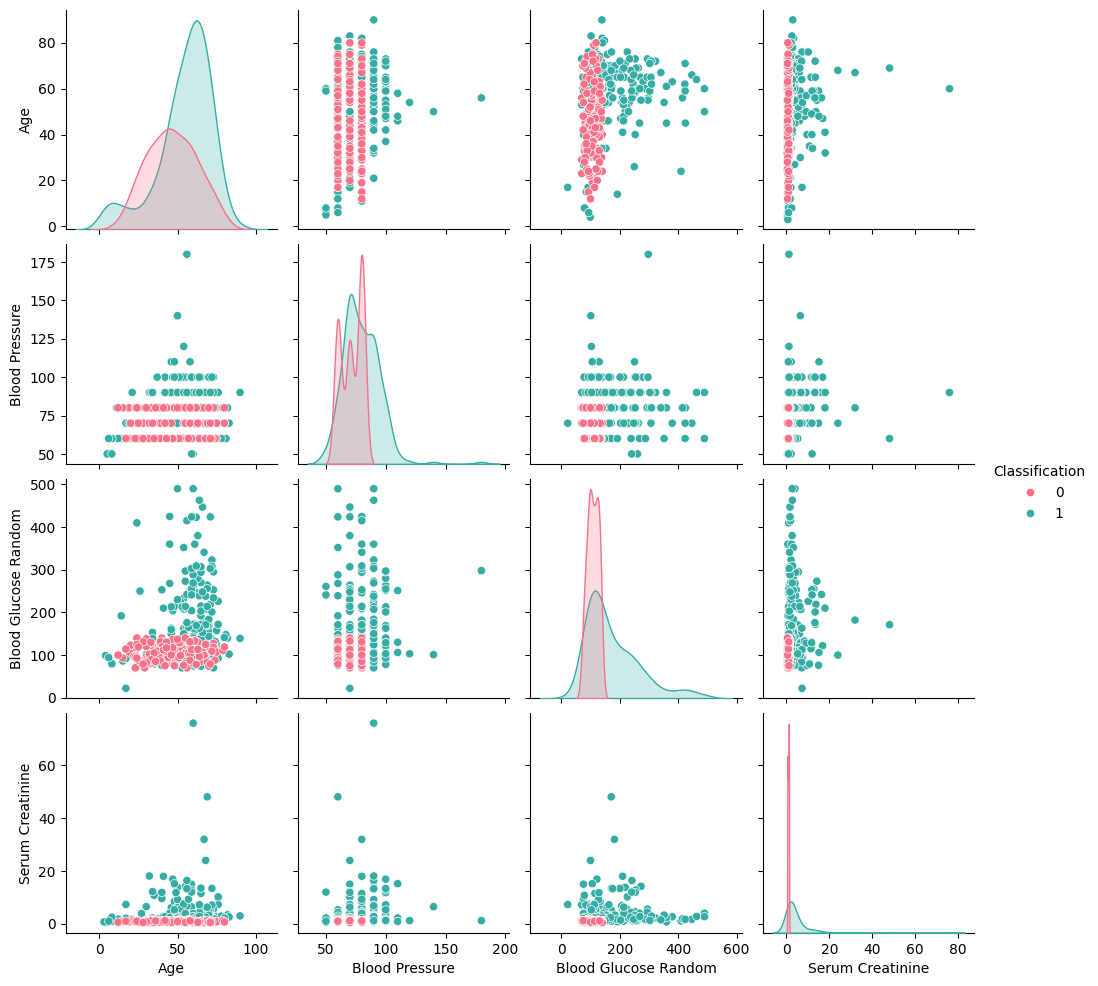

In [97]:
sns.pairplot(df[cols],hue='Classification',palette='husl')

In [98]:
df.corr(numeric_only=True)

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Blood Glucose Random,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Classification
Age,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928,-0.242119,0.118339,-0.268896,0.227268
Blood Pressure,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540,-0.326319,0.029753,-0.261936,0.294077
Specific Gravity,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582,0.603560,-0.236215,0.579476,-0.732163
Albumin,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632,-0.611891,0.231989,-0.566437,0.627090
Sugar,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775,-0.239189,0.184893,-0.237448,0.344070
Blood Glucose Random,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189,-0.301385,0.150015,-0.281541,0.419672
Blood Urea,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360,-0.607621,0.050462,-0.579087,0.380605
Serum Creatinine,0.132531,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670,-0.404193,-0.006390,-0.400852,0.299969
Sodium,-0.100046,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183,0.376914,0.007277,0.344873,-0.375674
Potassium,0.058377,0.075151,-0.072787,0.129038,0.219450,0.066966,0.357049,0.326107,0.097887,1.000000,-0.133746,-0.163182,-0.105576,-0.158309,0.084541


<Axes: >

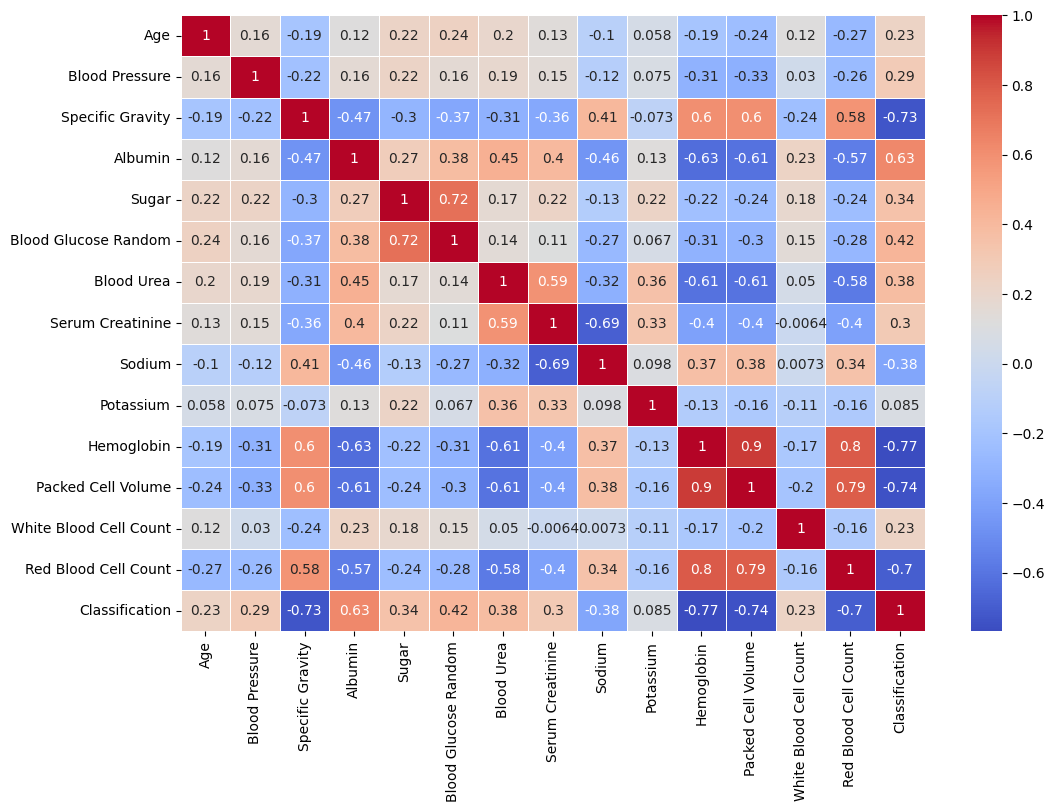

In [99]:
corr=df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True,cmap='coolwarm',linewidths=0.5)

<Axes: xlabel='Diabetes Mellitus', ylabel='Age'>

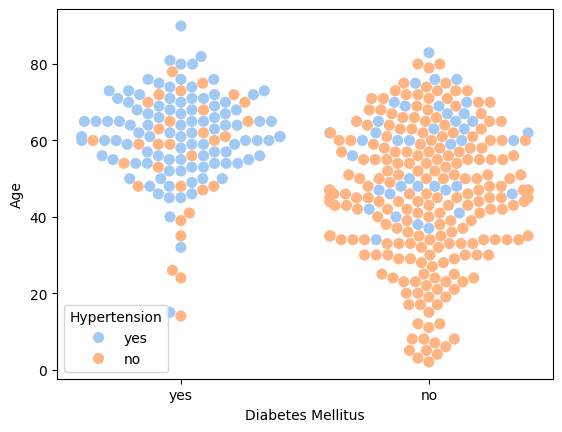

In [101]:
sns.swarmplot(x='Diabetes Mellitus',y='Age',hue='Hypertension',data=df,palette='pastel',size=8)

In [102]:
#Swaem plot allow us to see all the overlapping data as well 

In [114]:
fig=px.scatter(df,x='Age',y='Blood Pressure',color='Classification')
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [113]:
px.scatter_3d(df,x='Age',y='Blood Pressure',z='Serum Creatinine' ,color='Classification',title="3D scatter")


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': ('Age=%{x}<br>Blood Pressure=%{y' ... '%{marker.color}<extra></extra>'),
              'legendgroup': '',
              'marker': {'color': {'bdata': ('AQEBAQEBAQEBAQEBAQEBAQEBAQEBAQ' ... 'AAAAAAAAAAAAAAAAAAAAAAAAAAAA=='),
                                   'dtype': 'i1'},
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'scene': 'scene',
              'showlegend': False,
              'type': 'scatter3d',
              'x': {'bdata': ('AAAAAAAASEAAAAAAAAAcQAAAAAAAAE' ... 'AAAAAoQAAAAAAAADFAAAAAAAAATUA='),
                    'dtype': 'f8'},
              'y': {'bdata': ('AAAAAAAAVEAAAAAAAABJQAAAAAAAAF' ... 'AAAABUQAAAAAAAAE5AAAAAAAAAVEA='),
                    'dtype': 'f8'},
              'z': {'bdata': ('MzMzMzMz8z+amZmZmZnpP83MzMzMzP' ... 'MzMzPjPwAAAAAAAPA/mpmZmZmZ8T8='),
                    'dtype': 'f8'}}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'Classification'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'scene': {'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
                         'xaxis': {'title': {'text': 'Age'}},
                         'yaxis': {'title': {'text': 'Blood Pressure'}},
                         'zaxis': {'title': {'text': 'Serum Creatinine'}}},
               'template': '...',
               'title': {'text': '3D scatter'}}
})

In [111]:
df.columns

Index(['Age', 'Blood Pressure', 'Specific Gravity', 'Albumin', 'Sugar',
       'Red Blood Cells', 'Pus Cells', 'Pus Cell Clumps', 'Bacteria',
       'Blood Glucose Random', 'Blood Urea', 'Serum Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed Cell Volume',
       'White Blood Cell Count', 'Red Blood Cell Count', 'Hypertension',
       'Diabetes Mellitus', 'Coronary Artery Disease', 'Appetite',
       'Pedal Edema', 'Anemia', 'Classification'],
      dtype='object')

In [116]:
import plotly.graph_objects as go
data_corr=df.corr(numeric_only=True)
fig=go.Figure(data=go.Heatmap(z=data_corr.values,x=data_corr.columns,y=data_corr.index))
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [118]:
df.isnull().sum()

Age                          9
Blood Pressure              12
Specific Gravity            47
Albumin                     46
Sugar                       49
Red Blood Cells            152
Pus Cells                   65
Pus Cell Clumps              4
Bacteria                     4
Blood Glucose Random        44
Blood Urea                  19
Serum Creatinine            17
Sodium                      87
Potassium                   88
Hemoglobin                  52
Packed Cell Volume          71
White Blood Cell Count     106
Red Blood Cell Count       131
Hypertension                 2
Diabetes Mellitus            2
Coronary Artery Disease      2
Appetite                     1
Pedal Edema                  1
Anemia                       1
Classification               0
dtype: int64

In [119]:
numerical_col

['Age',
 'Blood Pressure',
 'Specific Gravity',
 'Albumin',
 'Sugar',
 'Red Blood Cells',
 'Pus Cells',
 'Pus Cell Clumps',
 'Bacteria',
 'Blood Glucose Random',
 'Blood Urea',
 'Serum Creatinine',
 'Sodium',
 'Potassium',
 'Hemoglobin',
 'Packed Cell Volume',
 'White Blood Cell Count',
 'Red Blood Cell Count',
 'Hypertension',
 'Diabetes Mellitus',
 'Coronary Artery Disease',
 'Appetite',
 'Pedal Edema',
 'Anemia',
 'Classification']

In [120]:
categorical_col

['Red Blood Cells',
 'Pus Cells',
 'Pus Cell Clumps',
 'Bacteria',
 'Hypertension',
 'Diabetes Mellitus',
 'Coronary Artery Disease',
 'Appetite',
 'Pedal Edema',
 'Anemia',
 'Classification']

In [123]:
#replace with meadian ,mean >> for numerical col
numerical_col = df.select_dtypes(include=[np.number]).columns  # Select only numeric columns
median_val = df[numerical_col].median()


In [124]:
median_val

Age                         55.00
Blood Pressure              80.00
Specific Gravity             1.02
Albumin                      0.00
Sugar                        0.00
Blood Glucose Random       121.00
Blood Urea                  42.00
Serum Creatinine             1.30
Sodium                     138.00
Potassium                    4.40
Hemoglobin                  12.65
Packed Cell Volume          40.00
White Blood Cell Count    8000.00
Red Blood Cell Count         4.80
Classification               1.00
dtype: float64

In [125]:
df[numerical_col]=df[numerical_col].fillna(median_val)

In [126]:
df[numerical_col].isna().sum()

Age                       0
Blood Pressure            0
Specific Gravity          0
Albumin                   0
Sugar                     0
Blood Glucose Random      0
Blood Urea                0
Serum Creatinine          0
Sodium                    0
Potassium                 0
Hemoglobin                0
Packed Cell Volume        0
White Blood Cell Count    0
Red Blood Cell Count      0
Classification            0
dtype: int64

In [128]:
mod_val=df.mode().iloc[0]

In [129]:
df[categorical_col]=df[categorical_col].fillna(mod_val)

In [130]:
df[categorical_col].isna().sum()

Red Blood Cells            0
Pus Cells                  0
Pus Cell Clumps            0
Bacteria                   0
Hypertension               0
Diabetes Mellitus          0
Coronary Artery Disease    0
Appetite                   0
Pedal Edema                0
Anemia                     0
Classification             0
dtype: int64

In [131]:
#few col are the object col we want to convert it object into numerical
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
for col in categorical_col:
    df[col]=label_encoder.fit_transform(df[col])

In [132]:
df.head()

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Classification
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,1
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,...,38.0,6000.0,4.8,0,0,0,0,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.8,0,1,0,1,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,1


In [133]:
df.dtypes

Age                        float64
Blood Pressure             float64
Specific Gravity           float64
Albumin                    float64
Sugar                      float64
Red Blood Cells              int64
Pus Cells                    int64
Pus Cell Clumps              int64
Bacteria                     int64
Blood Glucose Random       float64
Blood Urea                 float64
Serum Creatinine           float64
Sodium                     float64
Potassium                  float64
Hemoglobin                 float64
Packed Cell Volume         float64
White Blood Cell Count     float64
Red Blood Cell Count       float64
Hypertension                 int64
Diabetes Mellitus            int64
Coronary Artery Disease      int64
Appetite                     int64
Pedal Edema                  int64
Anemia                       int64
Classification               int64
dtype: object